## A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

    The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house. 
- How well those variables describe the price of a house.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
data.shape

(1460, 81)

In [4]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Checking for nulls


In [6]:
nulls = data.isnull().sum()/len(data)*100
nulls.sort_values(ascending=False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

### Dropping columns havings nulls greater than 40%

In [7]:
nulls = list(nulls[nulls.values>=40].index)
data.drop(labels= nulls, axis=1, inplace=True)



In [8]:
data.shape

(1460, 76)

In [9]:
null = data.isnull().sum()/len(data)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [10]:
objects = list(data.select_dtypes(include=['object']))

In [11]:
objects

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [12]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 76 columns]

### imputing conditional variable nulls with 'none'

In [13]:
cond_nulls=['Electrical','MasVnrType','BsmtFinType1','BsmtCond','BsmtQual','BsmtFinType2','BsmtExposure','GarageType','GarageFinish','GarageQual','GarageCond',]
for i  in cond_nulls:
    data[i].fillna('none', inplace=True)

### treatment for remaining numerical columns with null values

In [14]:
data['LotFrontage'].value_counts(normalize=True)

60.0     0.119067
70.0     0.058285
80.0     0.057452
50.0     0.047460
75.0     0.044130
           ...   
137.0    0.000833
141.0    0.000833
38.0     0.000833
140.0    0.000833
46.0     0.000833
Name: LotFrontage, Length: 110, dtype: float64

In [15]:
data['GarageYrBlt'].value_counts(normalize=True)

2005.0    0.047136
2006.0    0.042785
2004.0    0.038434
2003.0    0.036258
2007.0    0.035533
            ...   
1927.0    0.000725
1900.0    0.000725
1906.0    0.000725
1908.0    0.000725
1933.0    0.000725
Name: GarageYrBlt, Length: 97, dtype: float64

In [16]:
data.GarageYrBlt.mode()

0    2005.0
dtype: float64

In [17]:
data.MasVnrArea.median()

0.0

In [18]:
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mode()))
data["GarageYrBlt"].fillna(data["GarageYrBlt"].mode(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data["Electrical"].dropna(inplace=True)

In [19]:
numeric = data.select_dtypes(include=['float64', 'int64'])
numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [20]:
numeric = numeric.drop(['Id'], axis=1)
numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

# The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.
### we know that the target variable is the sale price

In [21]:
data.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

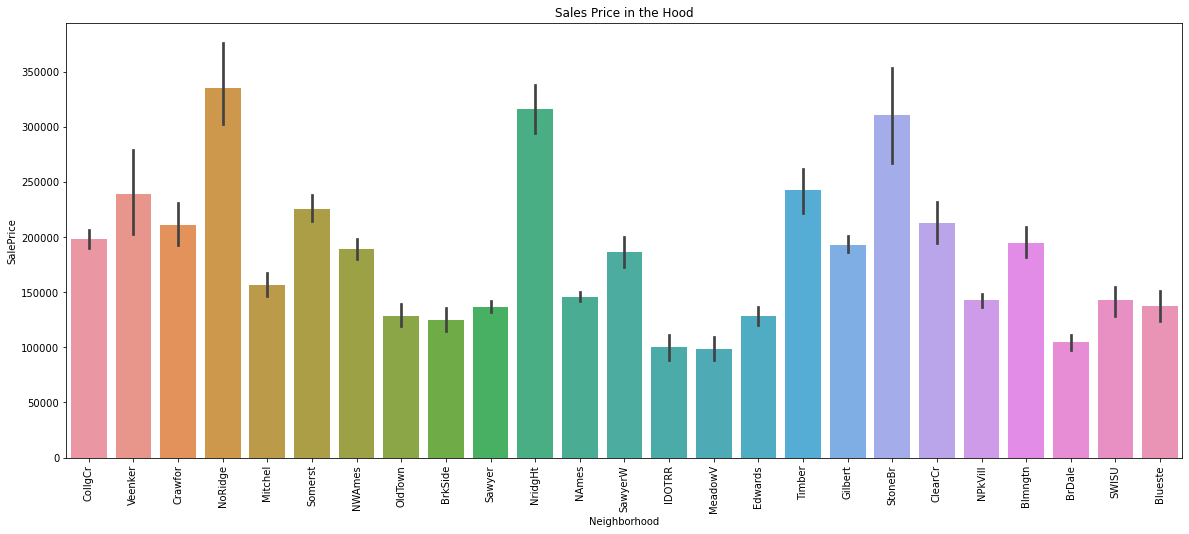

In [22]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price in the Hood")
plt.xticks(rotation=90)
plt.show()

## popular hoods are NoRidge, NridgHt, Timber, StoneBr

In [23]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100


In [24]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

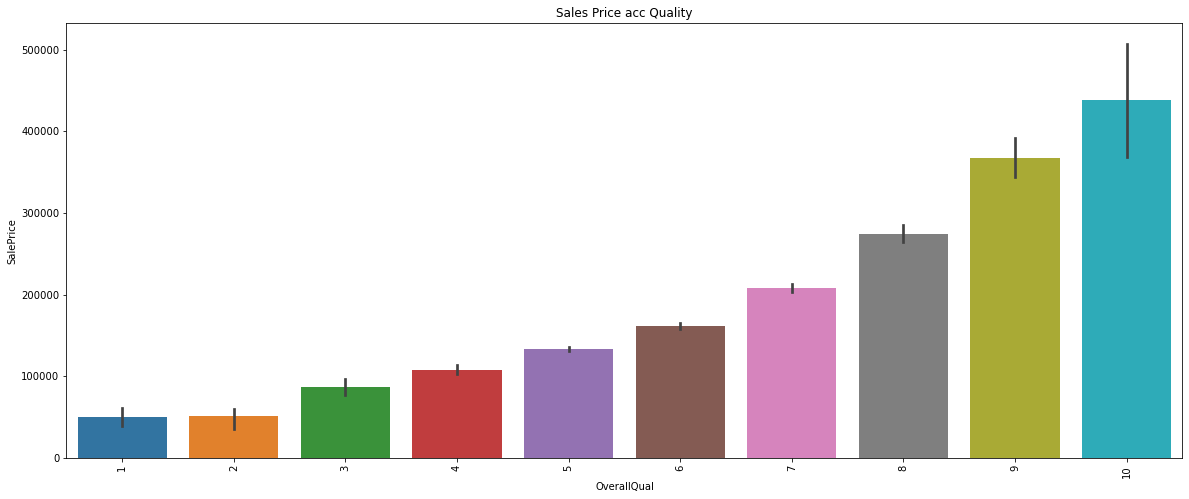

In [25]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price acc Quality")
plt.xticks(rotation=90)
plt.show()

### it shows an exponential growth wrt quality so we will check for skewness for sales price

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

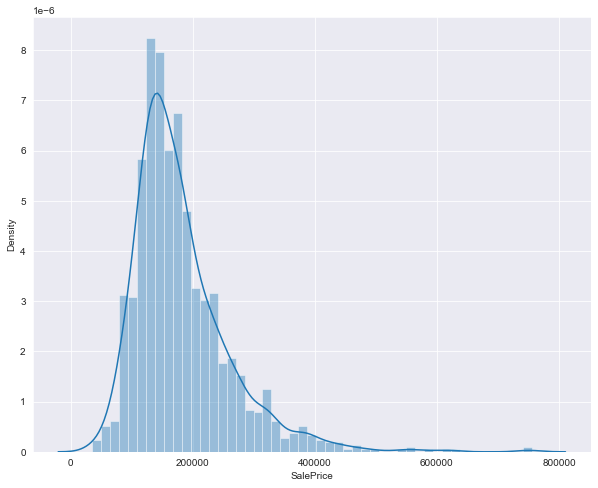

In [26]:
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(data['SalePrice'])

In [27]:
original = data.copy


## our assumption was right the data is skewed, we will try to make it more centralised

In [28]:
data['SalePrice']=np.log1p(data['SalePrice'])
sns.distplot(data['SalePrice'])


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

In [29]:
corr= numeric.corr()
corr

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.192411  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.192411    0.233633    0.049900   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

<function matplotlib.pyplot.show(close=None, block=None)>

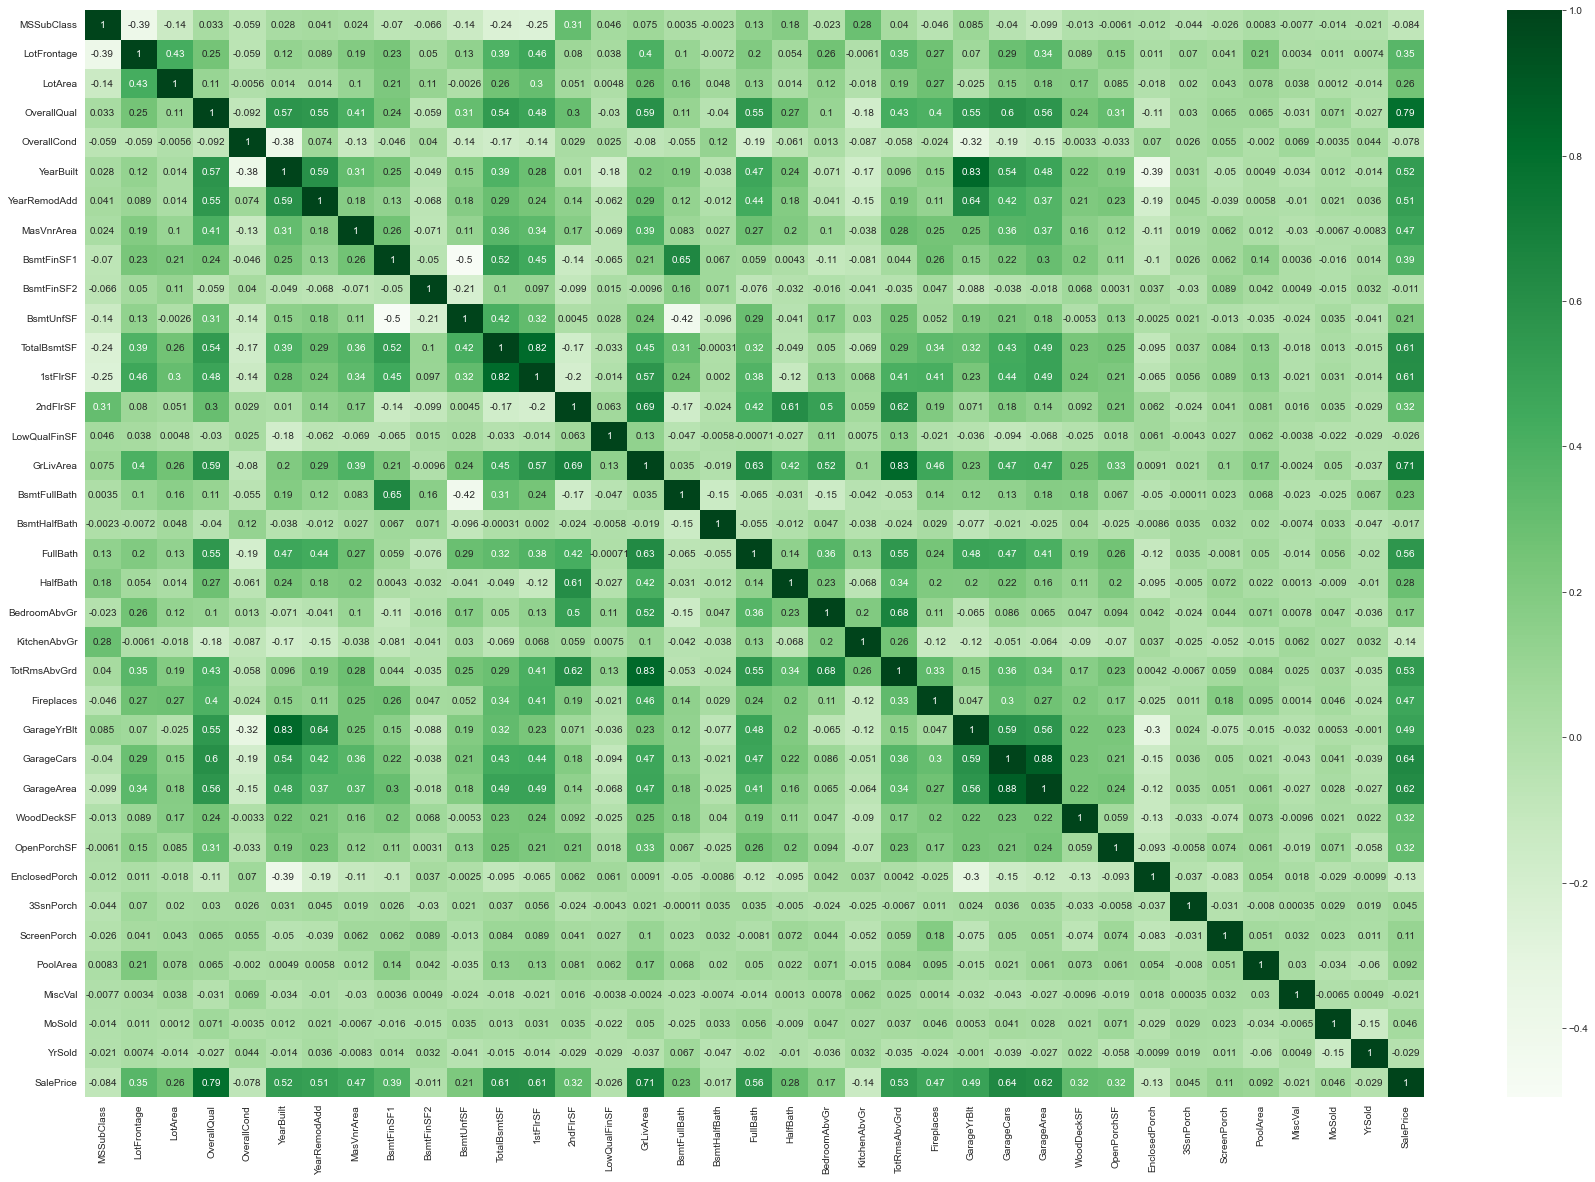

In [30]:
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show

### We can see that some of the variables are correlated
### so checking the same on a pairplot

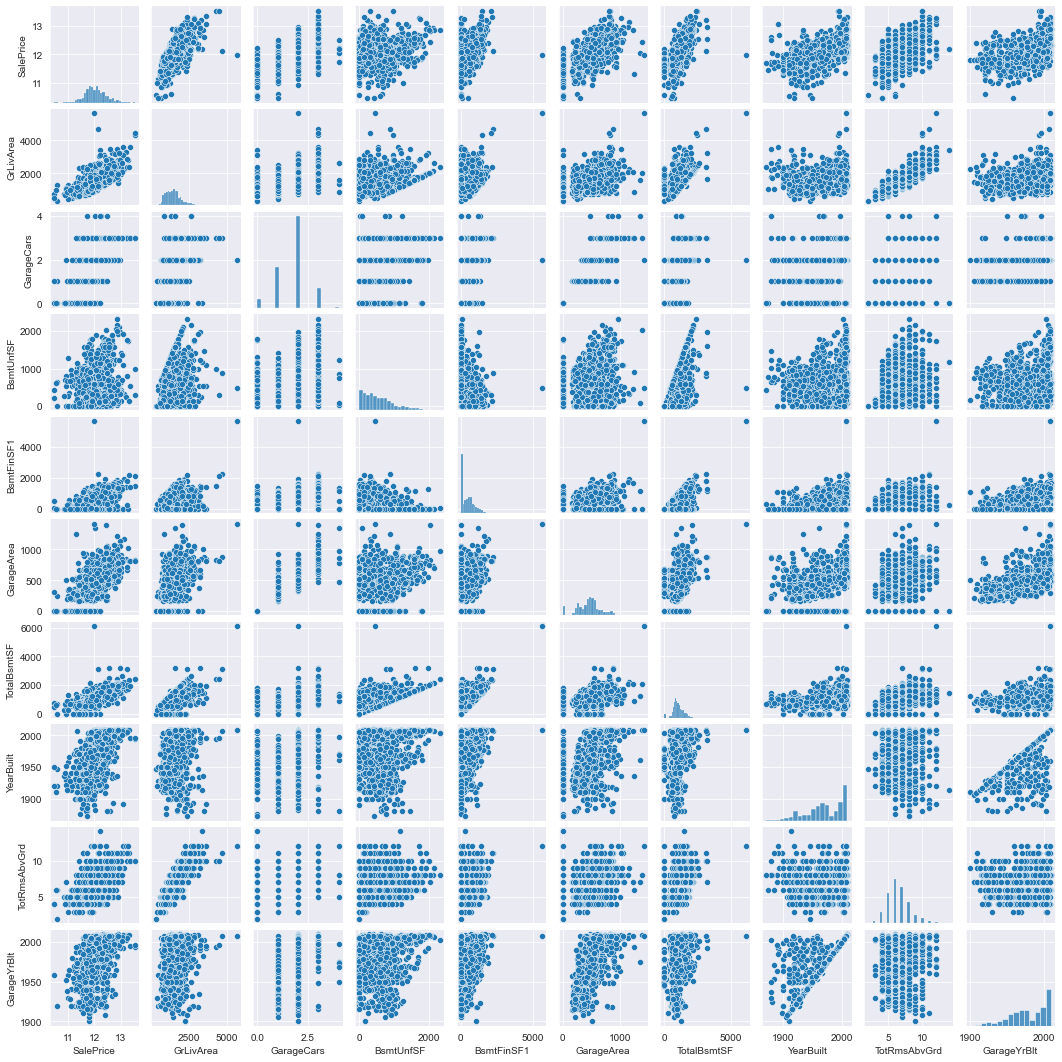

In [31]:
col = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[col], size= 1.5)
plt.show()

dropping the columns that arent useful

In [32]:
data = data.drop(['GarageCars','GarageYrBlt'], axis = 1)


In [33]:
data = data.drop(['BsmtUnfSF','TotRmsAbvGrd'], axis = 1)
data.shape

(1460, 72)

## We will test a general notion when it comes to property pricing, especially in case of already builtup places.
## It is usually ovserved that as the property age increases it decreases in value, it is not in correlation with the pricing of simple land prices that tend to increase or decrease with time.
### hence to test this notion we will determine the age of the properties and plot a graph to observe that if the same notion applies to our data as well or not.

In [34]:
data['Age'] = (data['YrSold'] - data['YearBuilt'])
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf           0          856    GasA        Ex          Y   
1          Unf           0         1262    GasA        Ex          Y   
2          Unf           0          920    GasA        Ex          Y   
3          Unf           0          756    GasA        Gd          Y   
4          Unf           0         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

  Functional  Fireplaces GarageType GarageFinish  GarageArea GarageQual  \
0        Typ           0     Attchd          RFn         548         TA   
1        Typ           1     Attchd          RFn         460         TA   
2        Typ           1     Attchd          RFn         608         TA   
3    

In [35]:
sns.lineplot(x="SalePrice", y="Age", data=data)
plt.show()

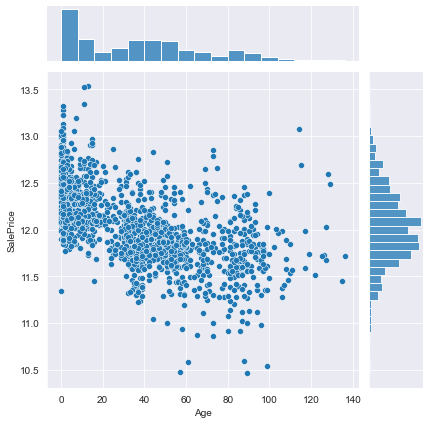

In [36]:
sns.jointplot(x = data['Age'], y = data['SalePrice'])
plt.show()

Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value

## drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further

In [37]:
data = data.drop(['MoSold','YearRemodAdd','YearBuilt','YrSold'], axis = 1)
print(data.shape)
data.head()


(1460, 69)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces GarageType  \
0             3             1          Gd        Typ           0     Attchd   
1             3             1          TA        Typ           1     Attchd   
2             3             1          Gd        Typ           1     Attchd   
3             3             1          Gd        Typ           1     Detchd   
4             4             1          Gd        Typ           1     Attchd   

  GarageFinish  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0          RFn         548         TA         TA          Y           0   
1          RFn         460         TA         TA          Y         298   
2          RFn         608

In [38]:
l2= data.select_dtypes(include=['float64', 'int64'])
print(l2.shape)
l2.head()


(1460, 31)


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1          60         65.0     8450            7            5       196.0   
1   2          20         80.0     9600            6            8         0.0   
2   3          60         68.0    11250            7            5       162.0   
3   4          70         60.0     9550            7            5         0.0   
4   5          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  Age  
0              0          0            0         0        0  12.247699    5  
1              0          0            0         0        0  12.109016   31  
2              0          0            0         0        0  12.317171    7  
3            272          0            0         0        0  11.849405   91  
4              0          0            0         0        0  12.429220    8

    There are a lot of columns wich have similar value counts for their rows hence the data shows very low
    variance.
    Some of these so called columns may also contain high volume of null values thus it is advisable to drop
    such columns.
    
    
    
    NOTE:- HERE WE CANNOT USE VIF TO COMPUTE THEIR VARIANCE AS IF WE ARE CORRECT AND COLUMNS HAVE NULLS PRESENT IN
    THEM THEN THE VIF FUNCTION WILL NOT WORK.

In [39]:
for i in l2:
    print(data[i].value_counts(normalize=True))

1       0.000685
982     0.000685
980     0.000685
979     0.000685
978     0.000685
          ...   
485     0.000685
484     0.000685
483     0.000685
482     0.000685
1460    0.000685
Name: Id, Length: 1460, dtype: float64
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
60.0     0.119067
70.0     0.058285
80.0     0.057452
50.0     0.047460
75.0     0.044130
           ...   
137.0    0.000833
141.0    0.000833
38.0     0.000833
140.0    0.000833
46.0     0.000833
Name: LotFrontage, Length: 110, dtype: float64
7200     0.017123
9600     0.016438
6000     0.011644
9000     0.009589
8400     0.009589
           ...   
14601    0.000685
13682    0.000685
4058     0.000685
17104    0.000685
9717     0.000685
Name: LotArea, Length: 1073, dtype: float64
5     0.271918

In [40]:
for i in l2:
    print(data[i].value_counts())

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
0.0      869
180.0      8
72.0       8
108.0      

In [41]:
data.shape

(1460, 69)

In [42]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces GarageType  \
0             3             1          Gd        Typ           0     Attchd   
1             3             1          TA        Typ           1     Attchd   
2             3             1          Gd        Typ           1     Attchd   
3             3             1          Gd        Typ           1     Detchd   
4             4             1          Gd        Typ           1     Attchd   

  GarageFinish  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0          RFn         548         TA         TA          Y           0   
1          RFn         460         TA         TA          Y         298   
2          RFn         608

In [43]:
data = data.drop(['MiscVal', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Functional' ], axis = 1)
print(data.shape)
data.head()


(1460, 63)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle  \
0    AllPub    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
1    AllPub       FR2       Gtl      Veenker      Feedr     1Fam     1Story   
2    AllPub    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
3    AllPub    Corner       Gtl      Crawfor       Norm     1Fam     2Story   
4    AllPub       FR2       Gtl      NoRidge       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  \
0            7            5     Gable     VinylSd     VinylSd    BrkFace   
1            6            8     Gable     MetalSd     MetalSd       None   
2            7            5     Gable     VinylSd     VinylSd    BrkFace   
3            7            5     Gable     Wd Sdng     Wd Shng       None   
4            8            5     Gable     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF HeatingQC  \
0          GLQ         706          Unf           0          856        Ex   
1          ALQ         978          Unf           0         1262        Ex   
2          GLQ         486          Unf           0          920        Ex   
3          ALQ         216          Unf           0          756        Gd   
4          GLQ         655          Unf           0         1145        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  Fireplaces GarageType GarageFinish  GarageArea GarageQual  \
0          Gd           0     Attchd          RFn         548         TA   
1          TA           1     Attchd          RFn         460         TA   
2          Gd           1     Attchd          RFn         608         TA   
3          Gd           1     Detchd          Unf         642         TA   
4          Gd           1     Attchd          RFn         836         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y           0           61              0          0            0   
1          Y         298            0              0          0            0   
2          Y           0     

# data preparation

In [44]:
data = data.drop(['Id'], axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle  \
0    AllPub    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
1    AllPub       FR2       Gtl      Veenker      Feedr     1Fam     1Story   
2    AllPub    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
3    AllPub    Corner       Gtl      Crawfor       Norm     1Fam     2Story   
4    AllPub       FR2       Gtl      NoRidge       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  \
0            7            5     Gable     VinylSd     VinylSd    BrkFace   
1            6            8     Gable     MetalSd     MetalSd       None   
2            7            5     Gable     VinylSd     VinylSd    BrkFace   
3            7            5     Gable     Wd Sdng     Wd Shng       None   
4            8            5     Gable     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF HeatingQC  \
0          GLQ         706          Unf           0          856        Ex   
1          ALQ         978          Unf           0         1262        Ex   
2          GLQ         486          Unf           0          920        Ex   
3          ALQ         216          Unf           0          756        Gd   
4          GLQ         655          Unf           0         1145        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  Fireplaces GarageType GarageFinish  GarageArea GarageQual  \
0          Gd           0     Attchd          RFn         548         TA   
1          TA           1     Attchd          RFn         460         TA   
2          Gd           1     Attchd          RFn         608         TA   
3          Gd           1     Detchd          Unf         642         TA   
4          Gd           1     Attchd          RFn         836         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y           0           61              0          0            0   
1          Y         298            0              0          0            0   
2          Y           0           42              0 

In [45]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
TotalBsmtSF        0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
Fireplaces         0
GarageType   

In [46]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)


## creating dummy for categorical columns

In [47]:
data = pd.get_dummies(data, drop_first=True)
data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  Age  \
0              0          0            0         0  12.247699    5   
1              0          0            0         0  12.109016   31   
2              0          0            0         0  12.317171    7   
3            272          0            0         0  11.849405   91   
4              0          0            0         0  12.429220    8   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Bluest

In [48]:
X = data.drop(['SalePrice'], axis=1)
y= data['SalePrice']


In [49]:
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  Age  MSZoning_FV  \
0              0          0            0         0    5            0   
1              0          0            0         0   31            0   
2              0          0            0         0    7            0   
3            272          0            0         0   91            0   
4              0          0            0         0    8            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  \
0            0            1            0            1             0   
1            0            1            0            1             0   
2            0            1            0            1             0   
3            0            1            0            1             0   
4            0            1            0            1             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                 

# splitting the data into train and test data

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Age']

In [53]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Building the first model

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [55]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('MSSubClass', True, 1),
 ('LotFrontage', False, 80),
 ('LotArea', False, 58),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 83),
 ('BsmtFinSF1', False, 38),
 ('BsmtFinSF2', False, 102),
 ('TotalBsmtSF', False, 90),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 28),
 ('BsmtHalfBath', False, 96),
 ('FullBath', False, 25),
 ('HalfBath', False, 22),
 ('BedroomAbvGr', False, 16),
 ('KitchenAbvGr', False, 88),
 ('Fireplaces', False, 13),
 ('GarageArea', False, 2),
 ('WoodDeckSF', False, 68),
 ('OpenPorchSF', False, 105),
 ('EnclosedPorch', False, 72),
 ('3SsnPorch', False, 82),
 ('ScreenPorch', False, 61),
 ('PoolArea', False, 69),
 ('Age', False, 9),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', False, 89),
 ('LotShape_IR2', True, 1),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 93),
 ('LandCon

In [57]:
cols = X_train.columns[rfe.support_]
cols

Index(['MSSubClass', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition1_RRAn', 'Condition1_RRNn',
       'BldgType_2fmCon', 'BldgType_Twnhs', 'HouseStyle_2.5Unf',
       'RoofStyle_Mansard', 'Exterior1st_BrkComm', 'E

In [58]:
X_train.columns[~rfe.support_]


Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'GarageQual_Po', 'GarageQual_TA', 'GarageQual_none', 'PavedDrive_P',
       'PavedDrive_Y', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_Family', 'SaleCondition_Partial'],
      dtype='object', length=105)

In [59]:
X_train_rfe = X_train[cols]


In [60]:
X_train_rfe.head()

MSSubClass  OverallQual  OverallCond  1stFlrSF  2ndFlrSF  LowQualFinSF  \
135    -0.868950     0.636031     0.392266  1.315652 -0.802294     -0.120313   
1452    2.882618    -0.823057    -0.508624 -0.251022 -0.802294     -0.120313   
762     0.068942     0.636031    -0.508624 -1.042064  0.973582     -0.120313   
932    -0.868950     2.095118    -0.508624  1.888387 -0.802294     -0.120313   
435     0.068942     0.636031     0.392266 -0.880260  1.089252     -0.120313   

      GrLivArea  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
135    0.287835            0            0            1            0   
1452  -0.861565            0            0            0            1   
762    0.033459            1            0            0            0   
932    0.708025            0            0            1            0   
435    0.248265            0            0            1            0   

      LotShape_IR2  LotShape_IR3  LandContour_HLS  LandContour_Low  \
135              0             0                0                0   
1452             0             0                0                0   
762              0             0                0                0   
932              0             0                0                0   
435              1             0                0                0   

      LandContour_Lvl  Utilities_NoSeWa  LotConfig_FR2  LotConfig_FR3  \
135                 1                 0              0              0   
1452                1                 0              0              0   
762                 1                 0              0              0   
932                 1                 0              0              0   
435                 1                 0              0              0   

      LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
135               0                     0                    0   
1452              0                     0                    0   
762               0                     0                    0   
932               0                     0                    0   
435               0                     0                    0   

      Neighborhood_BrkSide  Neighborhood_CollgCr  Neighborhood_Edwards  \
135                      0                     0                     0   
1452                     0                     0                     1   
762                      0                     0                     0   
932                      0                     0                     0   
435                      0                     1                     0   

      Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
135                     0                     0                     0   
1452                    0                     0                     0   
762                     0                     0                     0   
932                     0                     0                     0   
435                     0                     0                     0   

      Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NoRidge  \
135                    0                    1                     0   
1452                   0                    0                     0   
762                    0                    0                     0   
932                    0                    0                     0   
435                    0                    0                     0   

      Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
135                      0                     0                   0   
1452                     0                     0                   0   
762                      0                     0                   0   
932                      0                     0                   0   
435                      0                     0                   0   

      Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_StoneBr  \
135                     

In [61]:
from sklearn.metrics import r2_score, mean_squared_error

## Now we will calculate some of the metrics

In [62]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr :-',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr :-',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr :-',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr :-',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr :-',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr:-',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train_lr :- 0.917442820368314
r2_test_lr :- -1.1292564545757046e+17
rss1_lr :- 13.078190109063968
rss2_lr :- 8.390832408613169e+18
mse_train_lr :- 0.012796663511804274
mse_test_lr:- 1.9157151617838284e+16


# the test set r2 score is not satisfactory, we will have to look into other regression models

# Namely LASSO & RIDGE Regression

In [63]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)


X_train (1022, 205)
y_train (1022,)


In [64]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [65]:
lambdas = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                     5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

In [66]:
folds = 5
model_cv = GridSearchCV(estimator = lasso, param_grid = lambdas, 
                        scoring= 'neg_mean_absolute_error', cv = folds, 
                        return_train_score=True,verbose = 1)      

In [67]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [69]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.295463      0.004019         0.005248        0.000380      0.0001   
1       0.048430      0.003667         0.004906        0.000036       0.001   
2       0.015376      0.000721         0.005103        0.000227        0.01   
3       0.012366      0.000619         0.005025        0.000114        0.05   
4       0.011777      0.000616         0.004955        0.000163         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.098888          -0.109277          -0.098002   
1   {'alpha': 0.001}          -0.097775          -0.107374          -0.093904   
2    {'alpha': 0.01}          -0.106465          -0.118831          -0.105327   
3    {'alpha': 0.05}          -0.127717          -0.141761          -0.149524   
4     {'alpha': 0.1}          -0.162483          -0.168270          -0.192531   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.104073          -0.101557        -0.102359        0.004061   
1          -0.095986          -0.096173        -0.098242        0.004729   
2          -0.105400          -0.096517        -0.106508        0.007132   
3          -0.134513          -0.120841        -0.134871        0.010103   
4          -0.164560          -0.153720        -0.168313        0.013020   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.079195           -0.065671   
1                1           -0.086661           -0.073789   
2                3           -0.103312           -0.088156   
3                4           -0.137549           -0.116716   
4                5           -0.173146           -0.154387   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.078484           -0.079632           -0.079241   
1           -0.086867           -0.086821           -0.085588   
2           -0.104185           -0.105603           -0.104921   
3           -0.135369           -0.135592           -0.137158   
4           -0.169498           -0.168163           -0.170230   

   mean_train_score  std_train_score  
0         -0.076445         0.005400  
1         -0.083945         0.005100  
2         -0.101235         0.006584  
3         -0.132477         0.007926  
4         -0.167085         0.006555

In [70]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')


plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

## From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,
but we will choose a low value of alpha to balance the trade-off between Bias-Variance
and to get the coefficients of smallest of features.

In [71]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-2.91592784e-02, -9.32086525e-03,  1.72563892e-02,  1.03089781e-01,
        4.99159843e-02, -3.50528264e-03, -8.88054788e-03,  2.28736900e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.71918524e-03,
        1.06680232e-01,  3.39221088e-02,  4.59817067e-03,  2.21890641e-02,
        1.68637234e-02,  1.75231959e-02, -2.43176271e-03,  2.77071138e-02,
        3.98865968e-02,  1.44518390e-02, -9.75388851e-04,  9.85782392e-03,
        8.07237143e-03,  1.65467704e-02, -1.19765509e-02, -5.93187828e-02,
        0.00000000e+00, -0.00000000e+00,  7.84810368e-03, -4.48323934e-02,
        0.00000000e+00,  8.16671906e-04, -1.64853778e-02, -0.00000000e+00,
        3.52345454e-02,  0.00000000e+00,  1.96200703e-02, -0.00000000e+00,
        3.08270193e-02, -0.00000000e+00, -0.00000000e+00, -7.25736254e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.05987730e-02,  1.72166603e-02, -0.00000000e+00,  9.01559941e-02,
       -4.72478218e-02, -

In [72]:
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.884),
 ('MSSubClass', -0.029),
 ('LotFrontage', -0.009),
 ('LotArea', 0.017),
 ('OverallQual', 0.103),
 ('OverallCond', 0.05),
 ('MasVnrArea', -0.004),
 ('BsmtFinSF1', -0.009),
 ('BsmtFinSF2', 0.002),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.107),
 ('BsmtFullBath', 0.034),
 ('BsmtHalfBath', 0.005),
 ('FullBath', 0.022),
 ('HalfBath', 0.017),
 ('BedroomAbvGr', 0.018),
 ('KitchenAbvGr', -0.002),
 ('Fireplaces', 0.028),
 ('GarageArea', 0.04),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.01),
 ('3SsnPorch', 0.008),
 ('ScreenPorch', 0.017),
 ('PoolArea', -0.012),
 ('Age', -0.059),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.008),
 ('MSZoning_RM', -0.045),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', 0.001),
 ('LotShape_IR3', -0.016),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.035),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', 0.02),
 ('Utilities_NoSeWa', -0.0

### Lasso brings the coefficients of insignificant features to zero

## Now we will calculate some of the metrics

In [73]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr :-', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr :-', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr :-', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr :-', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr :-', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr :-', mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr :- 0.8940586891304616
r2_test_lr :- 0.8943302762811137
rss1_lr :- 16.78255737582751
rss2_lr :- 7.851688062502814
mse_train_lr :- 0.016421289017443746
mse_test_lr :- 0.017926228453202773


## Dataframe from the coefficients obtained from Lasso

In [74]:
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para.head()

Variable   Coeff
0               constant  11.884
13             GrLivArea   0.107
4            OverallQual   0.103
68  Neighborhood_StoneBr   0.098
62  Neighborhood_NridgHt   0.095

In [75]:
# variables whose coeficients are non zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred.head()

Variable   Coeff
0               constant  11.884
13             GrLivArea   0.107
4            OverallQual   0.103
68  Neighborhood_StoneBr   0.098
62  Neighborhood_NridgHt   0.095

In [76]:
pred.shape

(82, 2)

In [77]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

In [78]:
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  cv = folds, 
                        return_train_score=True,verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
print(model_cv.best_params_)

{'alpha': 20}


In [80]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=50]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.016366      0.005304         0.005497        0.000398      0.0001   
1       0.013096      0.000421         0.005295        0.000127       0.001   
2       0.012639      0.000337         0.005157        0.000133        0.01   
3       0.012745      0.000134         0.005145        0.000060        0.05   
4       0.012571      0.000140         0.005157        0.000099         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.106960          -0.114120          -0.105987   
1   {'alpha': 0.001}          -0.106927          -0.114109          -0.105892   
2    {'alpha': 0.01}          -0.106620          -0.113993          -0.105205   
3    {'alpha': 0.05}          -0.105576          -0.113481          -0.103839   
4     {'alpha': 0.1}          -0.104695          -0.112896          -0.103268   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.107072          -0.107799        -0.108388        0.002924   
1          -0.107058          -0.107785        -0.108354        0.002940   
2          -0.106926          -0.107639        -0.108077        0.003062   
3          -0.106433          -0.107033        -0.107272        0.003286   
4          -0.106099          -0.106350        -0.106662        0.003306   

   rank_test_score  split0_train_score  split1_train_score  \
0               27           -0.078032           -0.063769   
1               26           -0.078031           -0.063769   
2               25           -0.078031           -0.063777   
3               24           -0.078031           -0.063850   
4               23           -0.078067           -0.063928   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.077440           -0.079211           -0.078250   
1           -0.077441           -0.079210           -0.078250   
2           -0.077456           -0.079202           -0.078253   
3           -0.077558           -0.079172           -0.078294   
4           -0.077629           -0.079142           -0.078337   

   mean_train_score  std_train_score  
0         -0.075340         0.005814  
1         -0.075340         0.005814  
2         -0.075344         0.005811  
3         -0.075381         0.005790  
4         -0.075421         0.005768

In [81]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')


plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

# Since the Negative Mean Absolute Error stabilises at alpha = 20, we will choose this for further analysis


In [82]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.74659385e-02 -1.05029742e-02  1.67736515e-02  9.50544948e-02
  4.74776637e-02 -5.22610185e-03 -1.13769088e-02  4.97816994e-03
 -5.02094065e-03  3.53276780e-02  3.96725147e-02  8.15793345e-03
  5.96145046e-02  3.16304648e-02  4.53165925e-03  2.48959888e-02
  2.10493265e-02  2.22058284e-02 -5.53843484e-03  2.87387332e-02
  3.64233078e-02  1.43662826e-02 -3.33256827e-03  1.08495415e-02
  9.12203677e-03  1.62673920e-02 -1.20911555e-02 -4.94867647e-02
  2.73972243e-02  6.31013368e-03  2.89448462e-02 -2.84351358e-02
  2.01164632e-03  2.05748014e-02 -3.59780944e-02 -1.60235847e-03
  5.16374629e-02  1.79745816e-02  3.78665296e-02 -9.26435876e-03
  2.90133867e-02 -2.11678340e-02 -6.71886142e-03 -1.36996926e-02
  6.76592299e-03  1.22280922e-03 -3.87866767e-03 -1.41194985e-02
  1.59629220e-02  2.54080422e-02 -2.27748541e-02  6.99981498e-02
 -5.90348266e-02 -2.14788788e-02 -3.15754906e-02 -3.70662160e-02
 -1.08812319e-02 -3.02999389e-02  3.24750378e-03 -1.97388293e-02
  3.60143716e-02  6.30450

In [83]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.907),
 ('MSSubClass', -0.027),
 ('LotFrontage', -0.011),
 ('LotArea', 0.017),
 ('OverallQual', 0.095),
 ('OverallCond', 0.047),
 ('MasVnrArea', -0.005),
 ('BsmtFinSF1', -0.011),
 ('BsmtFinSF2', 0.005),
 ('TotalBsmtSF', -0.005),
 ('1stFlrSF', 0.035),
 ('2ndFlrSF', 0.04),
 ('LowQualFinSF', 0.008),
 ('GrLivArea', 0.06),
 ('BsmtFullBath', 0.032),
 ('BsmtHalfBath', 0.005),
 ('FullBath', 0.025),
 ('HalfBath', 0.021),
 ('BedroomAbvGr', 0.022),
 ('KitchenAbvGr', -0.006),
 ('Fireplaces', 0.029),
 ('GarageArea', 0.036),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', -0.003),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.009),
 ('ScreenPorch', 0.016),
 ('PoolArea', -0.012),
 ('Age', -0.049),
 ('MSZoning_FV', 0.027),
 ('MSZoning_RH', 0.006),
 ('MSZoning_RL', 0.029),
 ('MSZoning_RM', -0.028),
 ('Street_Pave', 0.002),
 ('LotShape_IR2', 0.021),
 ('LotShape_IR3', -0.036),
 ('LotShape_Reg', -0.002),
 ('LandContour_HLS', 0.052),
 ('LandContour_Low', 0.018),
 ('LandContour_Lvl', 0.038),
 ('Utili

## Now we will calculate some of the metrics

In [84]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr :-', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr :-', r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr :-', rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr :-', rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr :-', mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr :-', mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr :- 0.9026069286228118
r2_test_lr :- 0.8938205512401254
rss1_lr :- 15.428398940697829
rss2_lr :- 7.889562695639302
mse_train_lr :- 0.0150962807638922
mse_test_lr :- 0.01801270021835457


In [85]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.174428e-01          0.894059          0.902607
1   R2 Score (Test)      -1.129256e+17          0.894330          0.893821
2       RSS (Train)       1.307819e+01         16.782557         15.428399
3        RSS (Test)       8.390832e+18          7.851688          7.889563
4       MSE (Train)       1.131223e-01          0.128146          0.122867
5        MSE (Test)       1.384094e+08          0.133889          0.134211

In [86]:
mod_ridge = list(zip(cols, model_parameters))


In [87]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                constant  11.907
4             OverallQual   0.095
52   Neighborhood_Crawfor   0.070
68   Neighborhood_StoneBr   0.067
62   Neighborhood_NridgHt   0.063
13              GrLivArea   0.060
97    Exterior1st_BrkFace   0.057
37        LandContour_HLS   0.052
72        Condition1_Norm   0.051
168          CentralAir_Y   0.049
5             OverallCond   0.047
148       BsmtExposure_Gd   0.044
136      Foundation_PConc   0.044
11               2ndFlrSF   0.040
202  SaleCondition_Alloca   0.038
39        LandContour_Lvl   0.038
21             GarageArea   0.036
61   Neighborhood_NoRidge   0.036
10               1stFlrSF   0.035
14           BsmtFullBath   0.032

# Regularising the data

In [88]:
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE.head()

Variable   Coeff
0     constant  11.907
1   MSSubClass  -0.027
2  LotFrontage  -0.011
3      LotArea   0.017
4  OverallQual   0.095

In [89]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [90]:
betas.shape

(205, 3)

In [91]:
pd.set_option('display.max_rows', None)
betas.head(100)

Linear     Ridge     Lasso
MSSubClass           -1.487551e-02 -0.027466 -0.029159
LotFrontage          -1.100872e-02 -0.010503 -0.009321
LotArea               1.943272e-02  0.016774  0.017256
OverallQual           7.176931e-02  0.095054  0.103090
OverallCond           4.272806e-02  0.047478  0.049916
MasVnrArea           -9.332590e-03 -0.005226 -0.003505
BsmtFinSF1           -1.702225e-02 -0.011377 -0.008881
BsmtFinSF2            2.875110e-03  0.004978  0.002287
TotalBsmtSF          -8.347872e-03 -0.005021  0.000000
1stFlrSF             -1.985512e+11  0.035328  0.000000
2ndFlrSF             -2.248383e+11  0.039673  0.000000
LowQualFinSF         -2.443956e+10  0.008158  0.001719
GrLivArea             2.706326e+11  0.059615  0.106680
BsmtFullBath          2.539178e-02  0.031630  0.033922
BsmtHalfBath          4.714639e-03  0.004532  0.004598
FullBath              2.400916e-02  0.024896  0.022189
HalfBath              2.237842e-02  0.021049  0.016864
BedroomAbvGr          2.718267e-02  0.022206  0.017523
KitchenAbvGr         -6.972652e-03 -0.005538 -0.002432
Fireplaces            2.514527e-02  0.028739  0.027707
GarageArea            3.558885e-02  0.036423  0.039887
WoodDeckSF            1.497389e-02  0.014366  0.014452
OpenPorchSF           8.148194e-04 -0.003333 -0.000975
EnclosedPorch         1.159674e-02  0.010850  0.009858
3SsnPorch             9.664060e-03  0.009122  0.008072
ScreenPorch           1.619276e-02  0.016267  0.016547
PoolArea             -1.350415e-02 -0.012091 -0.011977
Age                  -3.144627e-02 -0.049487 -0.059319
MSZoning_FV           3.169584e-01  0.027397  0.000000
MSZoning_RH           2.805354e-01  0.006310 -0.000000
MSZoning_RL           2.651438e-01  0.028945  0.007848
MSZoning_RM           2.582412e-01 -0.028435 -0.044832
Street_Pave           9.915021e-03  0.002012  0.000000
LotShape_IR2          3.756029e-02  0.020575  0.000817
LotShape_IR3         -7.279933e-02 -0.035978 -0.016485
LotShape_Reg          5.284204e-03 -0.001602 -0.000000
LandContour_HLS       1.334253e-01  0.051637  0.035235
LandContour_Low       1.076237e-01  0.017975  0.000000
LandContour_Lvl       1.130183e-01  0.037867  0.019620
Utilities_NoSeWa     -2.481425e-01 -0.009264 -0.000000
LotConfig_CulDSac     2.898741e-02  0.029013  0.030827
LotConfig_FR2        -6.410282e-02 -0.021168 -0.000000
LotConfig_FR3        -1.216780e-01 -0.006719 -0.000000
LotConfig_Inside     -2.121743e-02 -0.013700 -0.007257
LandSlope_Mod        -2.508429e-03  0.006766  0.000000
LandSlope_Sev        -5.585263e-02  0.001223  0.000000
Neighborhood_Blueste -1.408329e-01 -0.003879 -0.000000
Neighborhood_BrDale  -1.037193e-01 -0.014119 -0.000000
Neighborhood_BrkSide -5.230112e-02  0.015963  0.010599
Neighborhood_ClearCr  1.225835e-02  0.025408  0.017217
Neighborhood_CollgCr -4.142475e-02 -0.022775 -0.000000
Neighborhood_Crawfor  6.998121e-02  0.069998  0.090156
Neighborhood_Edwards -1.389715e-01 -0.059035 -0.047248
Neighborhood_Gilbert -2.612946e-02 -0.021479 -0.000000
Neighborhood_IDOTRR  -1.459543e-01 -0.031575 -0.007822
Neighborhood_MeadowV -2.329478e-01 -0.037066 -0.000000
Neighborhood_Mitchel -6.159596e-02 -0.010881 -0.000000
Neighborhood_NAmes   -9.536584e-02 -0.030300 -0.010487
Neighborhood_NPkVill  7.583000e-02  0.003248  0.000000
Neighborhood_NWAmes  -5.731659e-02 -0.019739 -0.000000
Neighborhood_NoRidge  8.187735e-02  0.036014  0.032590
Neighborhood_NridgHt  9.407380e-02  0.063045  0.094765
Neighborhood_OldTown -1.212641e-01 -0.009848  0.000000
Neighborhood_SWISU   -9.243257e-02 -0.021774 -0.000000
Neighborhood_Sawyer  -6.526091e-02 -0.011948 -0.000000
Neighborhood_SawyerW -4.157506e-02 -0.012572 -0.000000
Neighborhood_Somerst -1.046984e-02  0.025846  0.042643
Neighborhood_StoneBr  1.625493e-01  0.066764  0.098058
Neighborhood_Timber  -4.029364e-03  0.001470  0.000000
Neighborhood_Veenker  6.253946e-02  0.016416  0.000000
Condition1_Feedr      2.758044e-04 -0.010095 -0.000000
Condition1_Norm       5.933427e-02  0.050715  0.055855
Condition1_Po

# Observation:
   Though the model performance by **Ridge Regression** was better in terms of **R2 values** of Train and Test,
it is better to use **Lasso**, since it brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables.

- It is always advisable to use simple yet robust model.
- Equation can be formulated using the features and coefficients obtained by Lasso


In [92]:
pred.head(10)

Variable   Coeff
0                constant  11.884
13              GrLivArea   0.107
4             OverallQual   0.103
68   Neighborhood_StoneBr   0.098
62   Neighborhood_NridgHt   0.095
52   Neighborhood_Crawfor   0.090
97    Exterior1st_BrkFace   0.067
72        Condition1_Norm   0.056
148       BsmtExposure_Gd   0.054
168          CentralAir_Y   0.053

# These are the final top 10 features that are significant for predicting the price of house.
- The higher values of positive coeeficients suggest a high sale value.
- while buying yourself a home these factors should have most of your attention as these affect the price of the house the most.
- Also the negative coefficients suggest that these variables leat of a decrease in the property price. 


# If the market value of the house is lower when compared to the predicted price from thr model, we can buy the house and flip them on at a higher price.

# Additional Assignment Questions/Solutions

In [93]:
alpha = 0.002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-2.86883170e-02, -7.64002898e-03,  1.67584326e-02,  1.15943637e-01,
        4.84111773e-02, -1.25875919e-03, -0.00000000e+00,  0.00000000e+00,
        3.14336202e-03,  4.37139655e-03,  0.00000000e+00,  2.62481351e-04,
        1.01735574e-01,  3.26743626e-02,  2.79678033e-03,  2.10852454e-02,
        1.24791434e-02,  1.12607960e-02, -3.29222921e-03,  2.91797491e-02,
        4.66971823e-02,  1.43847262e-02, -0.00000000e+00,  7.62221725e-03,
        7.44558315e-03,  1.64224971e-02, -1.50673456e-02, -5.91554968e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -5.24422261e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -9.84947509e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.96297049e-02, -0.00000000e+00, -0.00000000e+00, -2.68497620e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  6.08925653e-02,
       -3.35142332e-02, -

In [94]:
y_pred_test = lasso.predict(X_test)
r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr :-', r2_test_lr)

r2_test_lr :- 0.8895043155720995


In [95]:
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.65273300e-02, -1.00713801e-02,  1.65904049e-02,  9.72001434e-02,
        4.79349794e-02, -3.32471844e-03, -7.72694138e-03,  4.16684230e-03,
        1.34220395e-03,  3.50560214e-02,  3.62232157e-02,  7.26922269e-03,
        5.64693110e-02,  3.08553237e-02,  4.15239114e-03,  2.58338671e-02,
        2.09942618e-02,  2.05760812e-02, -5.78352969e-03,  3.02673644e-02,
        3.90385112e-02,  1.45197889e-02, -3.44315445e-03,  9.84066757e-03,
        9.15098381e-03,  1.65179271e-02, -1.31464909e-02, -4.84693347e-02,
        2.01053630e-02,  2.47086420e-03,  2.59066657e-02, -3.04485576e-02,
        1.46576787e-03,  1.51265161e-02, -2.46238344e-02, -4.25814230e-03,
        3.48594377e-02,  9.49907087e-03,  2.14682156e-02, -4.86476565e-03,
        2.48098234e-02, -1.35524532e-02, -2.96937357e-03, -1.14978714e-02,
        7.85426612e-03,  1.92544053e-03, -2.05487996e-03, -1.05217216e-02,
        1.27856984e-02,  1.85773306e-02, -1.86140869e-02,  5.16483563e-02,
       -4.63080612e-02, -

In [96]:
y_pred_test = ridge.predict(X_test)
r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr :-', r2_test_lr)

r2_test_lr :- 0.8939726930170324


In [97]:
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE.head()

Variable   Coeff
0     constant  11.907
1   MSSubClass  -0.027
2  LotFrontage  -0.011
3      LotArea   0.017
4  OverallQual   0.095

In [98]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.shape

(205, 3)

In [99]:
pd.set_option('display.max_rows', None)
betas.head(100)

Linear     Ridge     Lasso
MSSubClass           -1.487551e-02 -0.026527 -0.028688
LotFrontage          -1.100872e-02 -0.010071 -0.007640
LotArea               1.943272e-02  0.016590  0.016758
OverallQual           7.176931e-02  0.097200  0.115944
OverallCond           4.272806e-02  0.047935  0.048411
MasVnrArea           -9.332590e-03 -0.003325 -0.001259
BsmtFinSF1           -1.702225e-02 -0.007727 -0.000000
BsmtFinSF2            2.875110e-03  0.004167  0.000000
TotalBsmtSF          -8.347872e-03  0.001342  0.003143
1stFlrSF             -1.985512e+11  0.035056  0.004371
2ndFlrSF             -2.248383e+11  0.036223  0.000000
LowQualFinSF         -2.443956e+10  0.007269  0.000262
GrLivArea             2.706326e+11  0.056469  0.101736
BsmtFullBath          2.539178e-02  0.030855  0.032674
BsmtHalfBath          4.714639e-03  0.004152  0.002797
FullBath              2.400916e-02  0.025834  0.021085
HalfBath              2.237842e-02  0.020994  0.012479
BedroomAbvGr          2.718267e-02  0.020576  0.011261
KitchenAbvGr         -6.972652e-03 -0.005784 -0.003292
Fireplaces            2.514527e-02  0.030267  0.029180
GarageArea            3.558885e-02  0.039039  0.046697
WoodDeckSF            1.497389e-02  0.014520  0.014385
OpenPorchSF           8.148194e-04 -0.003443 -0.000000
EnclosedPorch         1.159674e-02  0.009841  0.007622
3SsnPorch             9.664060e-03  0.009151  0.007446
ScreenPorch           1.619276e-02  0.016518  0.016422
PoolArea             -1.350415e-02 -0.013146 -0.015067
Age                  -3.144627e-02 -0.048469 -0.059155
MSZoning_FV           3.169584e-01  0.020105  0.000000
MSZoning_RH           2.805354e-01  0.002471 -0.000000
MSZoning_RL           2.651438e-01  0.025907  0.000000
MSZoning_RM           2.582412e-01 -0.030449 -0.052442
Street_Pave           9.915021e-03  0.001466  0.000000
LotShape_IR2          3.756029e-02  0.015127  0.000000
LotShape_IR3         -7.279933e-02 -0.024624 -0.000000
LotShape_Reg          5.284204e-03 -0.004258 -0.000985
LandContour_HLS       1.334253e-01  0.034859  0.000000
LandContour_Low       1.076237e-01  0.009499  0.000000
LandContour_Lvl       1.130183e-01  0.021468  0.000000
Utilities_NoSeWa     -2.481425e-01 -0.004865 -0.000000
LotConfig_CulDSac     2.898741e-02  0.024810  0.019630
LotConfig_FR2        -6.410282e-02 -0.013552 -0.000000
LotConfig_FR3        -1.216780e-01 -0.002969 -0.000000
LotConfig_Inside     -2.121743e-02 -0.011498 -0.002685
LandSlope_Mod        -2.508429e-03  0.007854  0.000000
LandSlope_Sev        -5.585263e-02  0.001925  0.000000
Neighborhood_Blueste -1.408329e-01 -0.002055 -0.000000
Neighborhood_BrDale  -1.037193e-01 -0.010522 -0.000000
Neighborhood_BrkSide -5.230112e-02  0.012786  0.000000
Neighborhood_ClearCr  1.225835e-02  0.018577  0.000000
Neighborhood_CollgCr -4.142475e-02 -0.018614 -0.000000
Neighborhood_Crawfor  6.998121e-02  0.051648  0.060893
Neighborhood_Edwards -1.389715e-01 -0.046308 -0.033514
Neighborhood_Gilbert -2.612946e-02 -0.017623 -0.000000
Neighborhood_IDOTRR  -1.459543e-01 -0.021746 -0.000000
Neighborhood_MeadowV -2.329478e-01 -0.022269 -0.000000
Neighborhood_Mitchel -6.159596e-02 -0.005275 -0.000000
Neighborhood_NAmes   -9.536584e-02 -0.021649 -0.000000
Neighborhood_NPkVill  7.583000e-02  0.000411 -0.000000
Neighborhood_NWAmes  -5.731659e-02 -0.015334 -0.000000
Neighborhood_NoRidge  8.187735e-02  0.023271  0.000000
Neighborhood_NridgHt  9.407380e-02  0.047497  0.052593
Neighborhood_OldTown -1.212641e-01 -0.007224 -0.000000
Neighborhood_SWISU   -9.243257e-02 -0.013603 -0.000000
Neighborhood_Sawyer  -6.526091e-02 -0.006608  0.000000
Neighborhood_SawyerW -4.157506e-02 -0.010085 -0.000000
Neighborhood_Somerst -1.046984e-02  0.020589  0.000000
Neighborhood_StoneBr  1.625493e-01  0.042479  0.026679
Neighborhood_Timber  -4.029364e-03  0.001987  0.000000
Neighborhood_Veenker  6.253946e-02  0.009900  0.000000
Condition1_Feedr      2.758044e-04 -0.012776 -0.000000
Condition1_Norm       5.933427e-02  0.044827  0.051166
Condition1_Po

In [100]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual             1.102081
GrLivArea               1.058094
Neighborhood_Crawfor    1.053005
OverallCond             1.049102
Neighborhood_NridgHt    1.048644
Condition1_Norm         1.045847
Neighborhood_StoneBr    1.043394
Exterior1st_BrkFace     1.041808
CentralAir_Y            1.040786
GarageArea              1.039811
Name: Ridge, dtype: float64

In [101]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual             1.122933
GrLivArea               1.107091
Neighborhood_Crawfor    1.062785
Neighborhood_NridgHt    1.054000
Condition1_Norm         1.052497
OverallCond             1.049602
Foundation_PConc        1.049559
GarageArea              1.047805
CentralAir_Y            1.038341
Exterior1st_BrkFace     1.034719
Name: Lasso, dtype: float64

In [102]:
fav5 = ['OverallQual','GrLivArea','Neighborhood_Crawfor','Neighborhood_NridgHt','Condition1_Norm']
X_train_dropped = X_train.drop(fav5, axis=1)
X_test_dropped = X_test.drop(fav5, axis=1)


In [103]:
lambdas = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                     5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

folds = 5
model_cv = GridSearchCV(estimator = lasso, param_grid = lambdas, 
                        scoring= 'neg_mean_absolute_error', cv = folds, 
                        return_train_score=True,verbose = 1)  

In [104]:
model_cv.fit(X_train_dropped, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
model_cv.best_params_

{'alpha': 0.001}

In [106]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_dropped, y_train)


Lasso(alpha=0.001)

In [107]:
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [108]:
r2_test_lr = r2_score(y_test, y_pred)
print('r2_test_lr :-', r2_test_lr)

r2_test_lr :- 0.8739090258338594


In [109]:
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas['Lasso'] = lasso.coef_
betas

Lasso
MSSubClass            -1.693345e-02
LotFrontage           -7.392597e-03
LotArea                1.311329e-02
OverallCond            6.544535e-02
MasVnrArea             1.672437e-03
BsmtFinSF1            -1.534830e-02
BsmtFinSF2             2.138277e-03
TotalBsmtSF            1.439249e-02
1stFlrSF               9.567685e-02
2ndFlrSF               1.013292e-01
LowQualFinSF           1.233156e-02
BsmtFullBath           2.965760e-02
BsmtHalfBath           3.206665e-03
FullBath               2.350548e-02
HalfBath               1.898333e-02
BedroomAbvGr           2.071959e-02
KitchenAbvGr          -1.498874e-02
Fireplaces             4.159622e-02
GarageArea             4.426335e-02
WoodDeckSF             1.069424e-02
OpenPorchSF           -3.933861e-03
EnclosedPorch          1.296669e-02
3SsnPorch              7.776918e-03
ScreenPorch            1.617553e-02
PoolArea              -1.513181e-02
Age                   -7.820762e-02
MSZoning_FV            0.000000e+00
MSZoning_RH           -0.000000e+00
MSZoning_RL            6.017773e-03
MSZoning_RM           -6.250335e-02
Street_Pave            0.000000e+00
LotShape_IR2           0.000000e+00
LotShape_IR3          -3.662390e-02
LotShape_Reg           0.000000e+00
LandContour_HLS        7.728751e-02
LandContour_Low        0.000000e+00
LandContour_Lvl        2.768950e-02
Utilities_NoSeWa      -0.000000e+00
LotConfig_CulDSac      2.295964e-02
LotConfig_FR2         -0.000000e+00
LotConfig_FR3          0.000000e+00
LotConfig_Inside      -1.312021e-03
LandSlope_Mod         -0.000000e+00
LandSlope_Sev          0.000000e+00
Neighborhood_Blueste  -0.000000e+00
Neighborhood_BrDale   -0.000000e+00
Neighborhood_BrkSide   0.000000e+00
Neighborhood_ClearCr   0.000000e+00
Neighborhood_CollgCr  -1.359520e-02
Neighborhood_Edwards  -9.482871e-02
Neighborhood_Gilbert  -1.696103e-02
Neighborhood_IDOTRR   -1.505751e-02
Neighborhood_MeadowV  -8.685853e-02
Neighborhood_Mitchel  -0.000000e+00
Neighborhood_NAmes    -3.925768e-02
Neighborhood_NPkVill  -0.000000e+00
Neighborhood_NWAmes   -1.639054e-02
Neighborhood_NoRidge   2.279568e-02
Neighborhood_OldTown  -0.000000e+00
Neighborhood_SWISU    -0.000000e+00
Neighborhood_Sawyer   -2.457035e-02
Neighborhood_SawyerW  -6.414884e-03
Neighborhood_Somerst   2.813398e-02
Neighborhood_StoneBr   1.088273e-01
Neighborhood_Timber    0.000000e+00
Neighborhood_Veenker   0.000000e+00
Condition1_Feedr      -5.832911e-02
Condition1_PosA       -0.000000e+00
Condition1_PosN       -0.000000e+00
Condition1_RRAe       -5.618122e-03
Condition1_RRAn        0.000000e+00
Condition1_RRNe       -0.000000e+00
Condition1_RRNn        0.000000e+00
BldgType_2fmCon        0.000000e+00
BldgType_Duplex        0.000000e+00
BldgType_Twnhs        -3.318843e-02
BldgType_TwnhsE       -0.000000e+00
HouseStyle_1.5Unf      0.000000e+00
HouseStyle_1Story      8.829094e-03
HouseStyle_2.5Fin     -0.000000e+00
HouseStyle_2.5Unf      0.000000e+00
HouseStyle_2Story     -1.243964e-02
HouseStyle_SFoyer     -0.000000e+00
HouseStyle_SLvl        0.000000e+00
RoofStyle_Gable       -2.879035e-02
RoofStyle_Gambrel      0.000000e+00
RoofStyle_Hip         -0.000000e+00
RoofStyle_Mansard      0.000000e+00
RoofStyle_Shed         0.000000e+00
Exterior1st_AsphShn    0.000000e+00
Exterior1st_BrkComm   -0.000000e+00
Exterior1st_BrkFace    7.973336e-02
Exterior1st_CBlock    -0.000000e+00
Exterior1st_CemntBd    0.000000e+00
Exterior1st_HdBoard   -9.830093e-03
Exterior1st_ImStucc    0.000000e+00
Exterior1st_MetalSd    6.446990e-03
Exterior1st_Plywood   -0.000000e+00
Exterior1st_Stone      0.000000e+00
Exterior1st_Stucco    -0.000000e+00
Exterior1st_VinylSd   -0.000000e+00
Exterior1st_Wd Sdng    0.000000e+00
Exterior1st_WdShing   -0.000000e+00
Exterior2nd_AsphShn    0.000000e+00
Exterior2nd_Brk Cmn   -0.000000e+00
Exterior2nd_BrkFace    0.000000e+00
Exterior2nd_CBlock    -0.000000e+00
Exterior2nd_CmentBd    0.000000e+00
Exterior2nd_HdBoard   -0.000000e+00
Exterior2nd_ImStucc    0.000000e+00
Exterior2nd_MetalSd    0.000000e+0

In [110]:
betas['Lasso'].sort_values(ascending=False)[:5]


Neighborhood_StoneBr    0.108827
2ndFlrSF                0.101329
1stFlrSF                0.095677
Exterior1st_BrkFace     0.079733
LandContour_HLS         0.077288
Name: Lasso, dtype: float64